In [100]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pymongo import MongoClient


In [101]:
cluster = MongoClient("mongodb://analyticslab-cosmosdb-dev:b9LZFoiyld9Bw1wxHzqKlx783zzvuex2xzePh7pS3y21UHVFbn7C15bsyqfCthE139hraUyTTSPYce0JrxNSVA%3D%3D@analyticslab-cosmosdb-dev.mongo.cosmos.azure.com:10255/?ssl=true&replicaSet=globaldb&retrywrites=false&maxIdleTimeMS=120000&appName=@analyticslab-cosmosdb-dev@")

In [102]:
db = cluster["cpfo-data"]
collection = db["cc-all-data"]

In [103]:
results= collection.find({"datapoint_name": "Ethanol US"})
results_list=list(results)
df1=pd.DataFrame(results_list)
df1=df1[['date', 'value']]
df1=df1.rename(columns={'value': 'Ethanol US'})

In [104]:
results= collection.find({"datapoint_name": "Ethanol Brazil"})
results_list=list(results)
df2=pd.DataFrame(results_list)
df2=df2[['date', 'value']]
df2=df2.rename(columns={'value': 'Ethanol Brazil'})

In [105]:
results= collection.find({"datapoint_name": "USD/INR exchange rate"})
results_list=list(results)
df3=pd.DataFrame(results_list)
df3=df3[['date', 'value']]
df3=df3.rename(columns={'value': 'USD/INR exchange rate'})

In [106]:
results= collection.find({"datapoint_name": "Ethanol Europe"})
results_list=list(results)
df4=pd.DataFrame(results_list)
df4=df4[['date', 'value']]
df4=df4.rename(columns={'value': 'Ethanol Europe'})

In [107]:
results= collection.find({"datapoint_name": "Federal funds rate"})
results_list=list(results)
df5=pd.DataFrame(results_list)
df5=df5[['date', 'value']]
df5=df5.rename(columns={'value': 'Federal funds rate'})

In [108]:
df=pd.merge(df1, df2,on='date')
df=pd.merge(df, df3, on='date')
df=pd.merge(df, df4, on='date')
df=pd.merge(df, df5, on='date')

In [109]:
df

,date,Ethanol US,Ethanol Brazil,USD/INR exchange rate,Ethanol Europe,Federal funds rate
0,2023-03-21,0.60,2.69,82.68,0.84,4.58
1,2023-03-24,0.62,2.70,82.35,0.84,4.83
2,2023-03-27,0.62,2.69,82.35,0.83,4.83
3,2023-03-28,0.62,2.68,82.16,0.83,4.83
4,2023-03-29,0.61,2.71,82.24,0.84,4.83
...,...,...,...,...,...,...
341,2024-06-27,0.57,2.41,83.46,0.75,5.33
342,2024-06-28,0.56,2.42,83.46,0.74,5.33
343,2024-06-29,0.56,2.42,83.46,0.74,5.33
344,2024-06-30,0.56,2.42,83.46,0.74,5.33


In [110]:
results= collection.find({"datapoint_name": "Ethanol Futures CLOSE"})
results_list=list(results)
df6=pd.DataFrame(results_list)
df6=df6[['date', 'value']]
df6=df6.rename(columns={'value': 'Ethanol Futures CLOSE'})

In [111]:
results= collection.find({"datapoint_name": "US Dollar Index CLOSE"})
results_list=list(results)
df7=pd.DataFrame(results_list)
df7=df7[['date', 'value']]
df7=df7.rename(columns={'value': 'US Dollar Index CLOSE'})

In [112]:
results= collection.find({"datapoint_name": "CBOE Volatility Index (VIX) CLOSE"})
results_list=list(results)
df8=pd.DataFrame(results_list)
df8=df8[['date', 'value']]
df8=df8.rename(columns={'value': 'CBOE Volatility Index (VIX) CLOSE'})

In [113]:
results= collection.find({"datapoint_name": "India Inflation data Core CPI"})
results_list=list(results)
df9=pd.DataFrame(results_list)
df9=df9[['date', 'value']]
df9=df9.rename(columns={'value': 'India Inflation data Core CPI'})

In [114]:
results= collection.find({"datapoint_name": "USD / Brazilian Real Rate"})
results_list=list(results)
df10=pd.DataFrame(results_list)
df10=df10[['date', 'value']]
df10=df10.rename(columns={'value': 'USD / Brazilian Real Rate'})

In [115]:
df=pd.merge(df, df6,on='date')
df=pd.merge(df, df7, on='date')
df=pd.merge(df, df8, on='date')
df=pd.merge(df, df9, on='date')
df=pd.merge(df, df10, on='date')

In [116]:
results= collection.find({"datapoint_name": "Brent crude oil CLOSE"})
results_list=list(results)
df11=pd.DataFrame(results_list)
df11=df11[['date', 'value']]
df11=df11.rename(columns={'value': 'Brent crude oil CLOSE'})

In [117]:
results= collection.find({"datapoint_name": "ICEUS Sugar #11 CLOSE"})
results_list=list(results)
df12=pd.DataFrame(results_list)
df12=df12[['date', 'value']]
df12=df12.rename(columns={'value': 'ICEUS Sugar #11 CLOSE'})

In [118]:
df=pd.merge(df, df11, on='date')
df=pd.merge(df, df12, on='date')

In [119]:
df

,date,Ethanol US,Ethanol Brazil,USD/INR exchange rate,Ethanol Europe,Federal funds rate,Ethanol Futures CLOSE,US Dollar Index CLOSE,CBOE Volatility Index (VIX) CLOSE,India Inflation data Core CPI,USD / Brazilian Real Rate,Brent crude oil CLOSE,ICEUS Sugar #11 CLOSE
0,2023-03-21,0.60,2.69,82.68,0.84,4.58,2.27,102.90,21.38,6.44,5.24,75.32,20.48
1,2023-03-24,0.62,2.70,82.35,0.84,4.83,2.32,102.76,21.74,6.44,5.25,74.99,20.89
2,2023-03-27,0.62,2.69,82.35,0.83,4.83,2.37,102.52,20.60,6.44,5.20,78.12,20.89
3,2023-03-28,0.62,2.68,82.16,0.83,4.83,2.36,102.11,19.97,6.44,5.17,78.65,20.89
4,2023-03-29,0.61,2.71,82.24,0.84,4.83,2.37,102.30,19.12,6.44,5.14,78.28,21.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2024-06-08,0.52,2.30,83.52,0.72,5.33,1.81,104.86,12.22,4.83,5.34,79.62,19.00
323,2024-06-09,0.52,2.30,83.52,0.72,5.33,1.81,104.86,12.22,4.83,5.34,79.62,19.00
324,2024-06-10,0.51,2.31,83.52,0.73,5.33,1.83,105.11,12.74,4.83,5.35,81.63,18.63
325,2024-06-11,0.52,2.32,83.60,0.73,5.33,1.83,105.20,12.85,4.83,5.37,81.92,18.79


In [120]:
correlation_matrix = df.corr()

<Axes: >

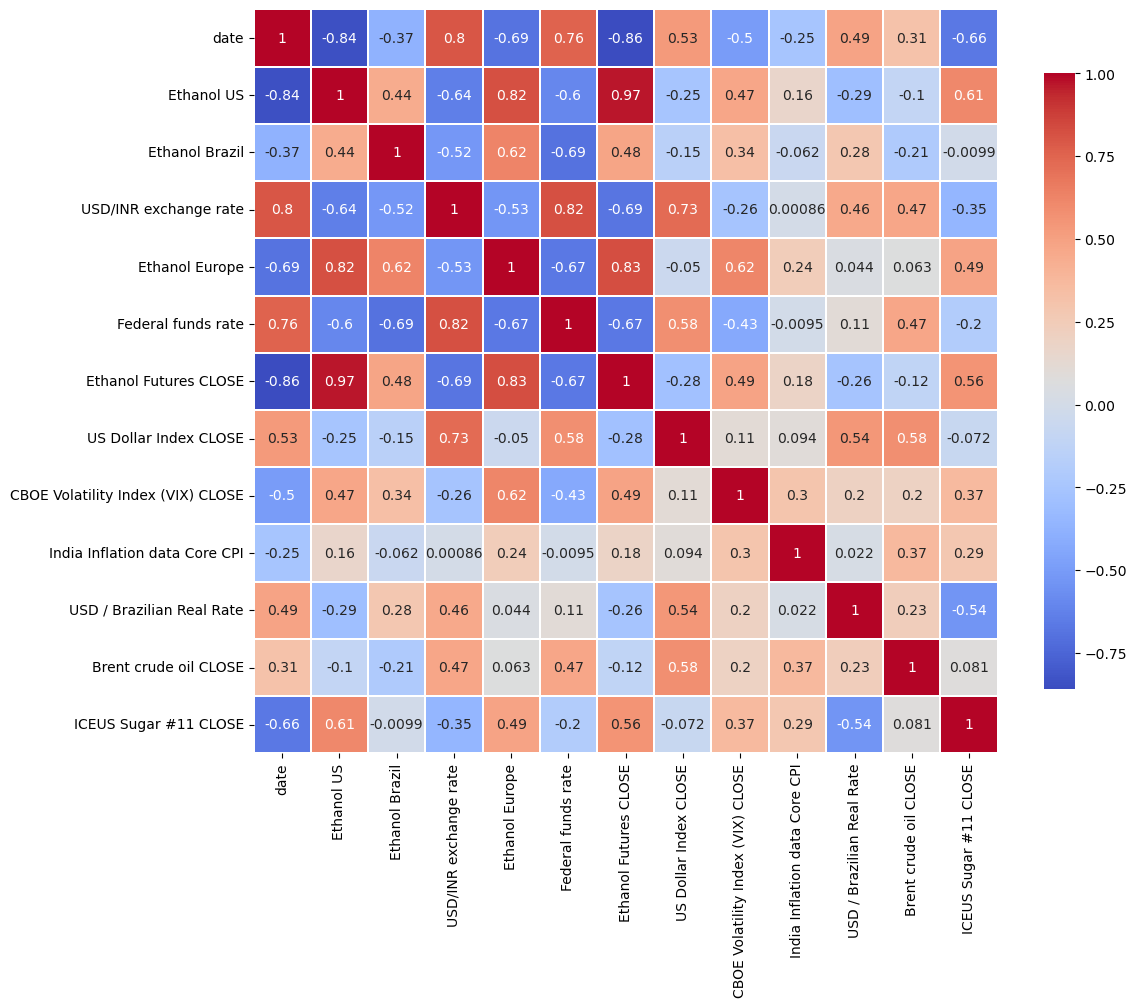

In [121]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [129]:
#SUGAR ICE RELEVANT DRIVERS
#Ethanol US (+ve)
#USD/INR exchange rate (-ve)
#Ethanol Europe (+ve)
#Ethanol Futures CLOSE (+ve)
#CBOE Volatility Index (VIX) CLOSE (+ve)
#India Inflation data Core CPI
#USD / Brazilian Real Rate (-ve)

In [123]:
df.set_index('date', inplace=True)

In [124]:
scaler=StandardScaler()
df[df.columns[1:]]=scaler.fit_transform(df[df.columns[1:]])

In [125]:
df.head()

,Ethanol US,Ethanol Brazil,USD/INR exchange rate,Ethanol Europe,Federal funds rate,Ethanol Futures CLOSE,US Dollar Index CLOSE,CBOE Volatility Index (VIX) CLOSE,India Inflation data Core CPI,USD / Brazilian Real Rate,Brent crude oil CLOSE,ICEUS Sugar #11 CLOSE
date,,,,,,,,,,,,
2023-03-21,0.60,1.281166,-0.404147,1.549076,-4.055347,0.763371,-0.436459,2.765538,1.294842,1.951223,-1.368714,-1.027864
2023-03-24,0.62,1.314799,-1.020389,1.549076,-2.516521,0.905137,-0.522377,2.922204,1.294842,2.028844,-1.431565,-0.880518
2023-03-27,0.62,1.281166,-1.020389,1.415563,-2.516521,1.046903,-0.669664,2.426094,1.294842,1.640736,-0.835433,-0.880518
2023-03-28,0.62,1.247532,-1.375195,1.415563,-2.516521,1.018550,-0.921281,2.151927,1.294842,1.407871,-0.734491,-0.880518
2023-03-29,0.61,1.348433,-1.225803,1.549076,-2.516521,1.046903,-0.804678,1.782021,1.294842,1.175006,-0.804960,-0.751141


Text(0, 0.5, 'Values')

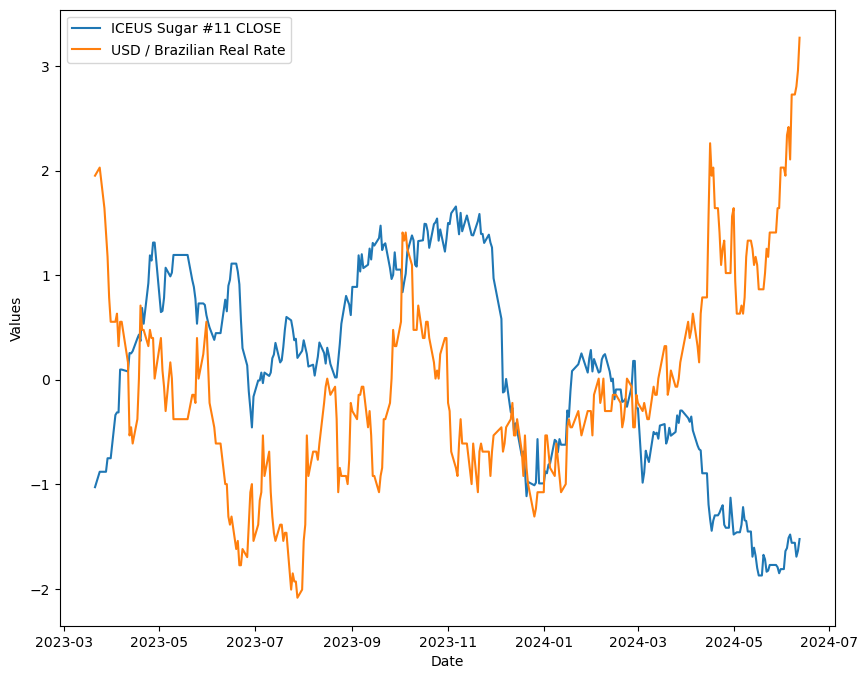

In [128]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df['ICEUS Sugar #11 CLOSE'], label='ICEUS Sugar #11 CLOSE')
# #plt.plot(df.index, df['Ethanol US'], label='Ethanol US')
# #plt.plot(df.index, df['USD/INR exchange rate'], label='USD/INR exchange rate')
# #plt.plot(df.index, df['Ethanol Europe'], label='Ethanol Europe')
# #plt.plot(df.index, df['Ethanol Futures CLOSE'], label='Ethanol Futures CLOSE')
# #plt.plot(df.index, df['CBOE Volatility Index (VIX) CLOSE'], label='CBOE Volatility Index (VIX) CLOSE')
plt.plot(df.index, df['USD / Brazilian Real Rate'], label='USD / Brazilian Real Rate')
# plt.plot(df.index, df['India Inflation data Core CPI'], label='India Inflation data Core CPI')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')